# Montecarlo methods
by aws 04/2016

In [7]:
import numpy as np
try:
    import matplotlib
    import matplotlib.pyplot as plt
    import matplotlib.ticker as ticker


    import scipy
    import scipy.optimize
    import scipy.stats
    import numpy
except:
    print """Requires scipy to on the path. Please either download it from 
    http://www.scipy.org/ or place it in the sys.path"""
    raise

def lorentzian_function(a,x):
    "a[0]=amplitude,a[1]=center,a[2]=FWHM"
    return a[0]*1/(1+(x-a[1])**2/(a[2]**2))

def gaussian_function(a,x):
    " a[0]=amplitude, a[1]=center, a[2]=std deviation"
    return a[0]*scipy.exp(-(x-a[1])**2/(2.0*a[2]**2))

def fit(function,xdata,ydata,a0):
    fit_dictionary={}
    error_function=lambda a, xdata, ydata:function(a,xdata)-ydata
    a,succes=scipy.optimize.leastsq(error_function, a0,args=(xdata,ydata))
    return a

<IPython.core.display.Javascript object>


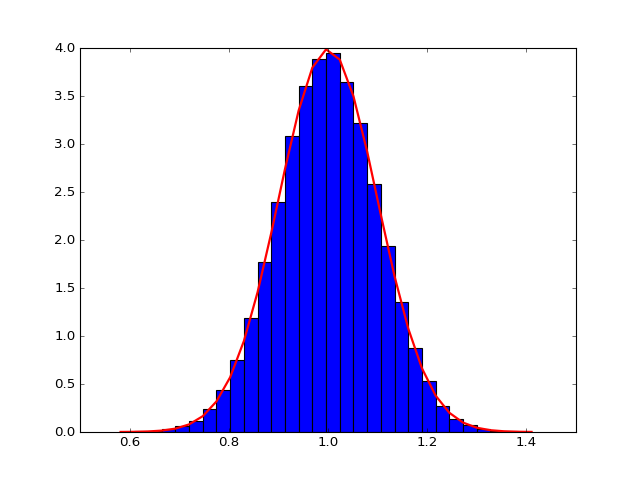

In [2]:
%matplotlib notebook
mu, sigma = 1, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 100000)

count, bins, ignored = plt.hist(s, 30, normed=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')
plt.show()

In [3]:
mu1,sigma1=1,.01
mu2,sigma2=2,2
mu3,sigma3=3,.1
a_random=[[np.random.normal(mu1,sigma1),np.random.normal(mu2,sigma2),np.random.normal(mu3,sigma3)] for i in range(100)]

In [4]:
a_random[0]

[0.987792804393101, 1.0639727410463027, 2.947446356639897]

In [5]:
x_list=np.linspace(-20,20,1000).tolist()
x_list=[x+np.random.normal(0,.5) for x in x_list]
data_1=[[gaussian_function(random,x)+np.random.normal(0,.01) for x in x_list] for random in a_random]

In [32]:
#data_1[0]

<IPython.core.display.Javascript object>


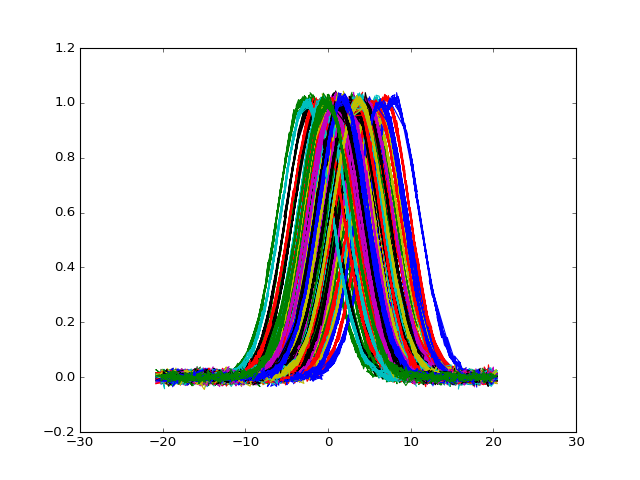

In [6]:
%matplotlib notebook
for data_set in data_1:
    plt.plot(x_list,data_set)
plt.show()

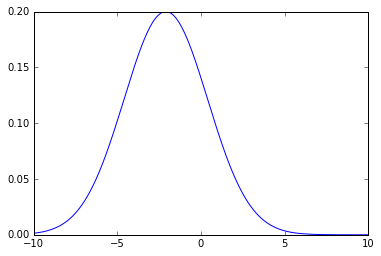

In [20]:
%matplotlib inline
plt.close()
from ipywidgets import *
def plot_gaussian(amplitude,mu,sigma):
    xdata=numpy.linspace(-10,10,1000)
    a=[amplitude,mu,sigma]
    ydata=[gaussian_function(a,x) for x in xdata]
    plt.plot(xdata,ydata)
    plt.show()
interact(lambda amplitude,mu,sigma:plot_gaussian(amplitude,mu,sigma),
         amplitude=(-1.,1.,.1),mu=(-10,10,.1),sigma=(-10,10,.1))

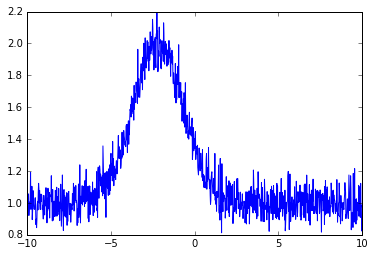

In [21]:
%matplotlib inline
from ipywidgets import *
import random
def plot_gaussian_with_noise(amplitude,mu,sigma,noise_distribution,noise_width,noise_center):
    xdata=numpy.linspace(-10,10,1000)
    a=[amplitude,mu,sigma]
    if noise_distribution in ['uniform']:
        left=noise_center-noise_width/2
        right=noise_center+noise_width/2
        [noise_width,noise_center]=[left,right]
        
    ydata=[gaussian_function(a,x)+random.__dict__[noise_distribution](noise_center,noise_width) for x in xdata]
    plt.plot(xdata,ydata)
    plt.show()
interact(plot_gaussian_with_noise,
         amplitude=(0.,1.,.1),mu=(-10,10,.1),sigma=(.1,10,.1),
         noise_distribution=('gauss','uniform','lognormvariate'),
         noise_width=(0,1,.01),noise_center=fixed(0))

In [ ]:
n_experiments=1000
num_x_points=1000
x_start=-10
x_stop=10



In [33]:
%%javascript
var svg_string='<table><td>Element</td></table>'
element.append(svg_string)
element.append('<h3>Hello There</h3>')
console.log('There')

<IPython.core.display.Javascript object>

$$
\begin{align}
\nabla \times \vec{\mathbf{B}} -\, \frac1c\, \frac{\partial\vec{\mathbf{E}}}{\partial t} & = \frac{4\pi}{c}\vec{\mathbf{j}} \\   \nabla \cdot \vec{\mathbf{E}} & = 4 \pi \rho \\
\nabla \times \vec{\mathbf{E}}\, +\, \frac1c\, \frac{\partial\vec{\mathbf{B}}}{\partial t} & = \vec{\mathbf{0}} \\
\nabla \cdot \vec{\mathbf{B}} & = 0
\end{align}
$$